<a href="https://colab.research.google.com/github/Grover1204/HR-Analytics-Employee/blob/main/HR_Analytics_Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics Employee Attrition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

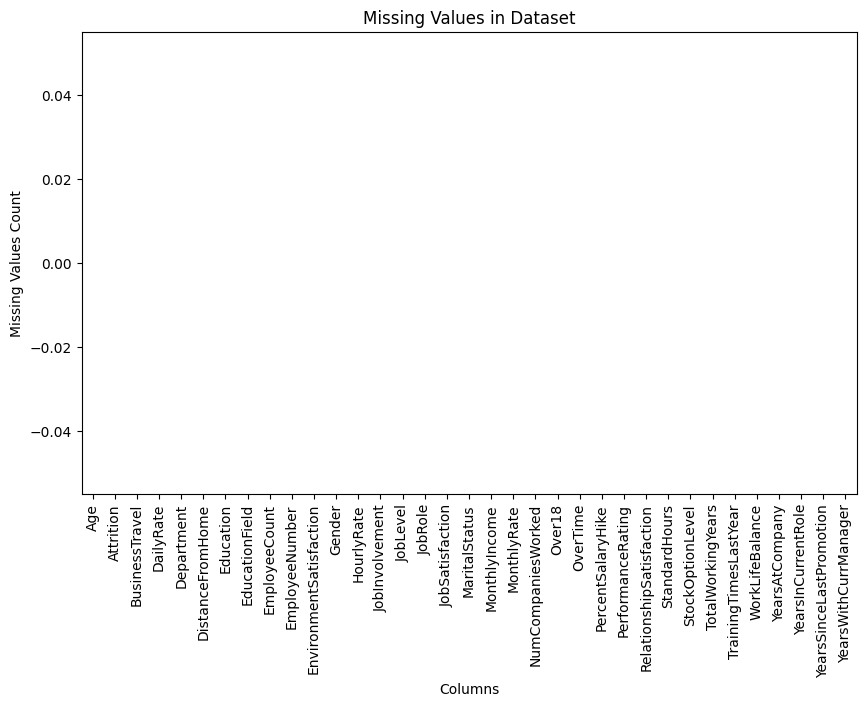

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in Dataset')
plt.show()


In [ ]:
# describe
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.shape

(1470, 35)

<Figure size 2000x800 with 0 Axes>

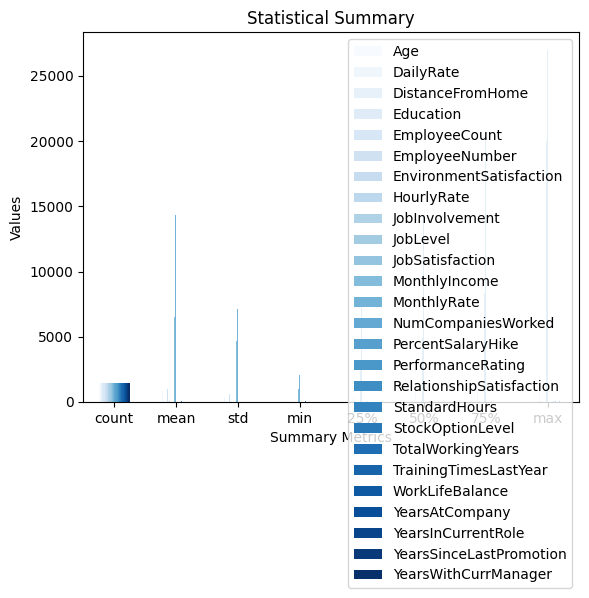

In [ ]:
import matplotlib.pyplot as plt

# Generate a bar plot
plt.figure(figsize=(20, 8))
df.describe().plot(kind='bar', colormap='Blues')
plt.title('Statistical Summary')
plt.xlabel('Summary Metrics')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.xticks(rotation=0)
plt.show()


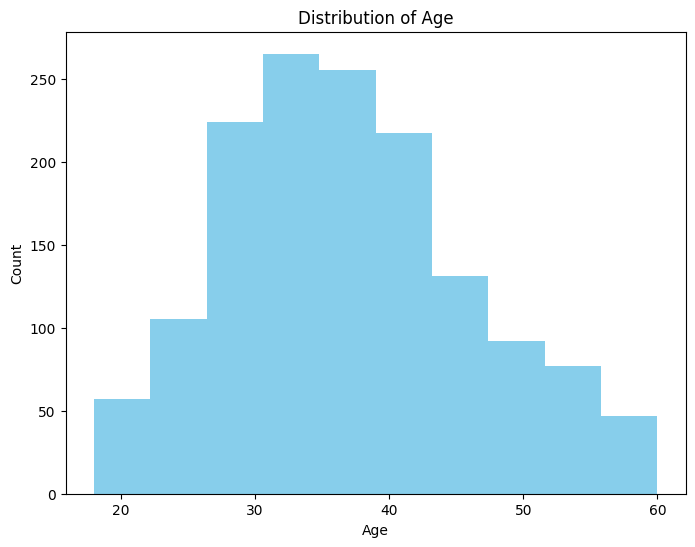

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


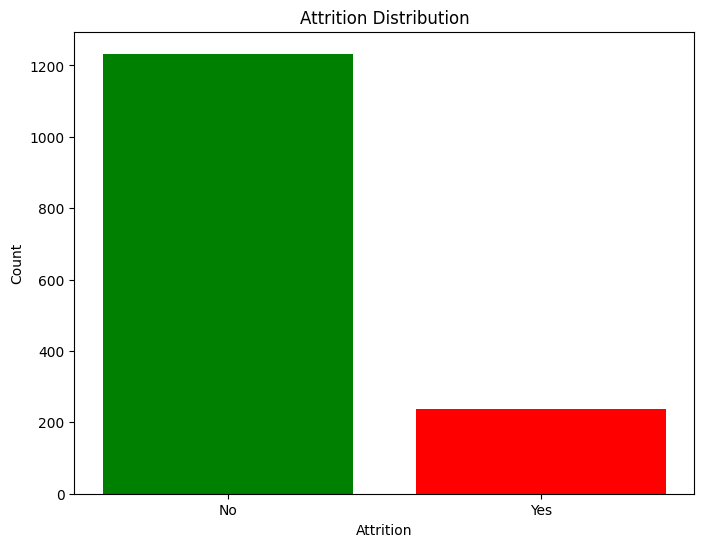

In [ ]:
# EDA - Bar plot of Attrition
plt.figure(figsize=(8, 6))
attrition_counts = df['Attrition'].value_counts()
plt.bar(attrition_counts.index, attrition_counts.values, color=['green', 'red'])
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Distribution')
plt.show()


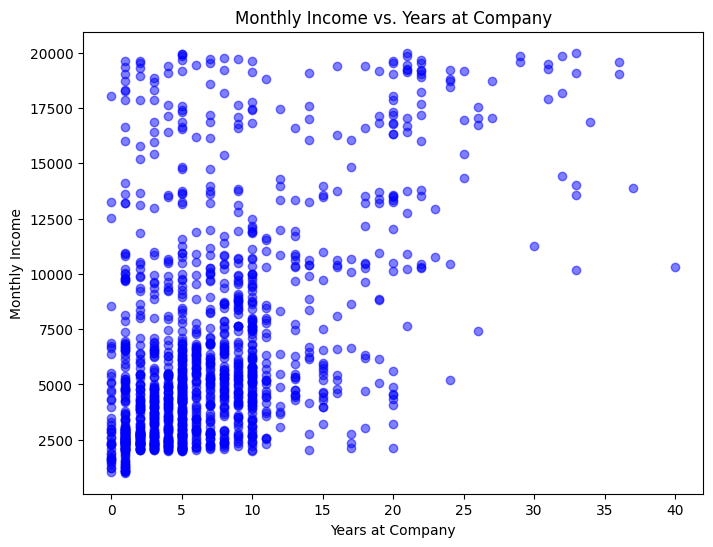

In [ ]:
# EDA - Scatter plot of MonthlyIncome vs. YearsAtCompany
plt.figure(figsize=(8, 6))
plt.scatter(df['YearsAtCompany'], df['MonthlyIncome'], color='blue', alpha=0.5)
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs. Years at Company')
plt.show()

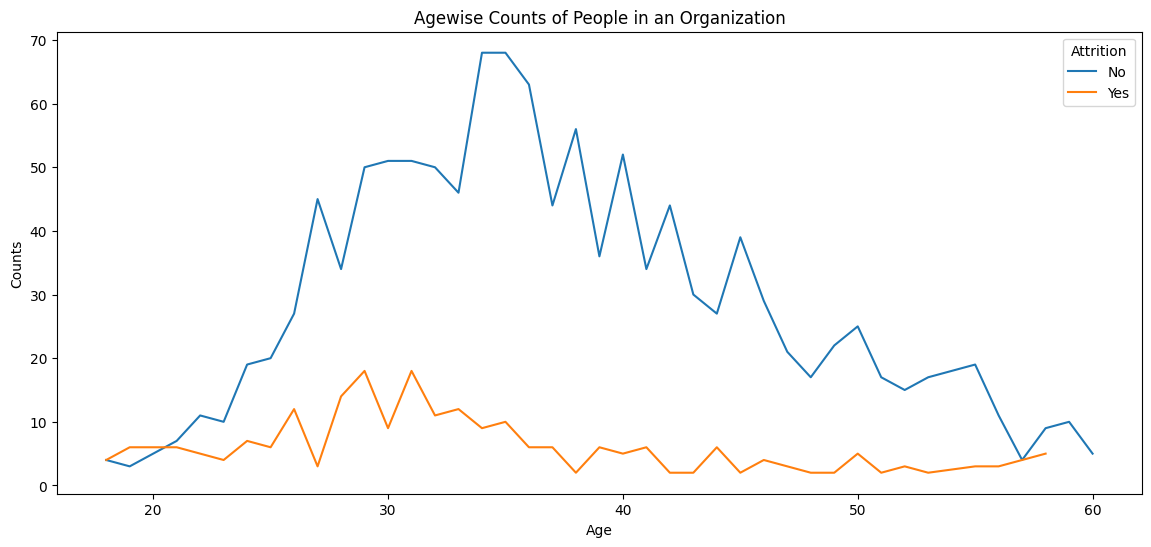

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

age_att = df.groupby(['Age','Attrition'])['DailyRate'].count().reset_index(name='Counts')

plt.figure(figsize=(14,6))
sns.lineplot(data=age_att, x='Age', y='Counts', hue='Attrition')
plt.title('Agewise Counts of People in an Organization')
plt.show()


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Analysis

In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame
hike_att = df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig = px.line(hike_att, x='PercentSalaryHike', y='Counts', color='Attrition', title='Hike Percentages people receive in an Organization vs Attrition')
fig.show()

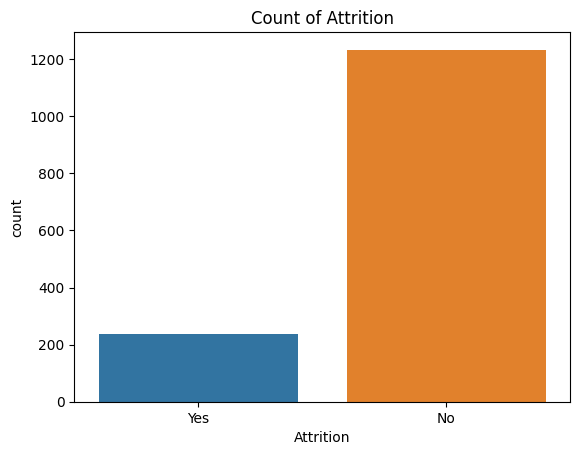

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Attrition', data=df)
plt.title('Count of Attrition')
plt.show()


In [ ]:
# logistice Regression

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# List of categorical columns to be encoded
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Convert categorical columns with one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols)

# Print the new dataframe
print(df.head())

# Convert 'Attrition' to binary format
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Print the updated 'Attrition' column
print(df['Attrition'].head())


   Age Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0   41       Yes       1102                 1          2              1   
1   49        No        279                 8          1              1   
2   37       Yes       1373                 2          2              1   
3   33        No       1392                 3          4              1   
4   27        No        591                 2          1              1   

   EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2  Female          94  ...   
1               2                        3    Male          61  ...   
2               4                        4    Male          92  ...   
3               5                        4  Female          56  ...   
4               7                        1    Male          40  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1 

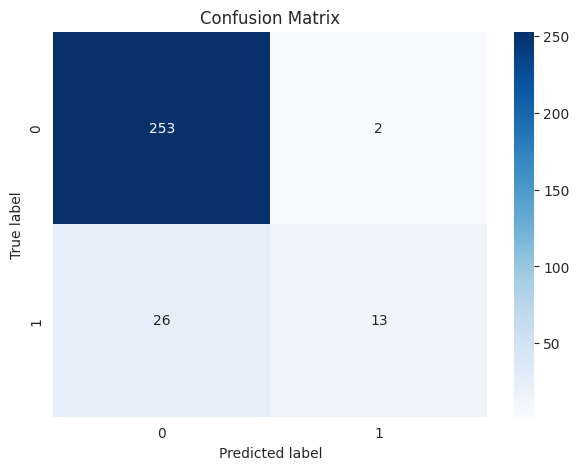

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Employee Attrition Rate

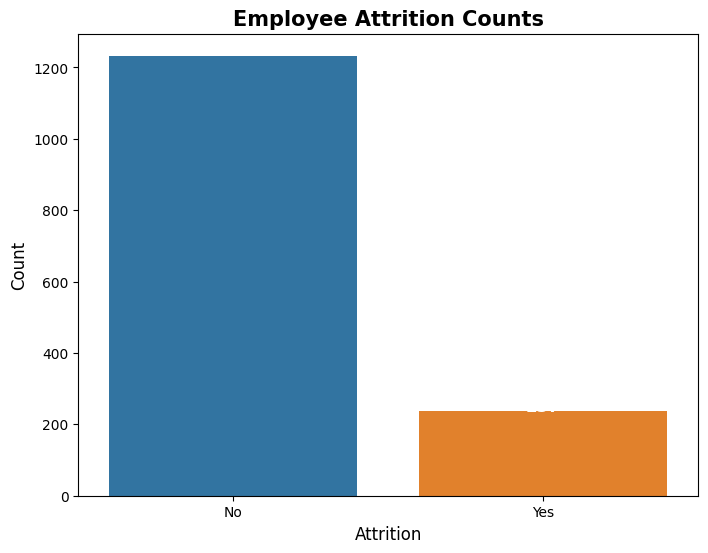

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization to show Employee Attrition in Counts
plt.figure(figsize=(8,6))
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values)
plt.title("Employee Attrition Counts", fontweight="bold", size=15)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, str(v), ha='center', fontweight='bold', fontsize=12, color='white')
plt.show()


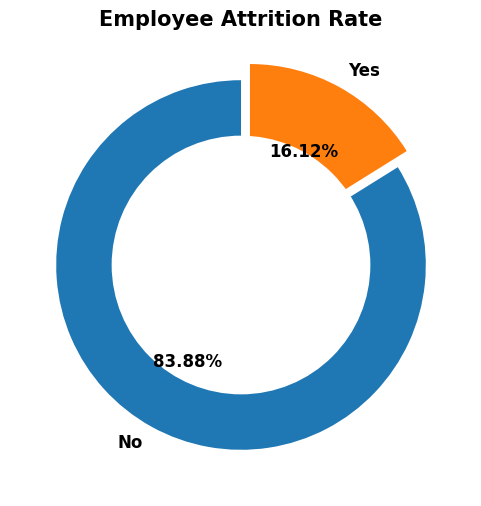

In [ ]:
# Visualization to show Employee Attrition in Percentage
plt.figure(figsize=(6,6))
attrition_rate = df["Attrition"].value_counts()
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"bold","size":12},
        explode=[0,0.1], startangle=90)
center_circle = plt.Circle((0, 0), 0.7, fc='white') # Increased the radius of the inner circle
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate", fontweight="bold", size=15)
plt.show()


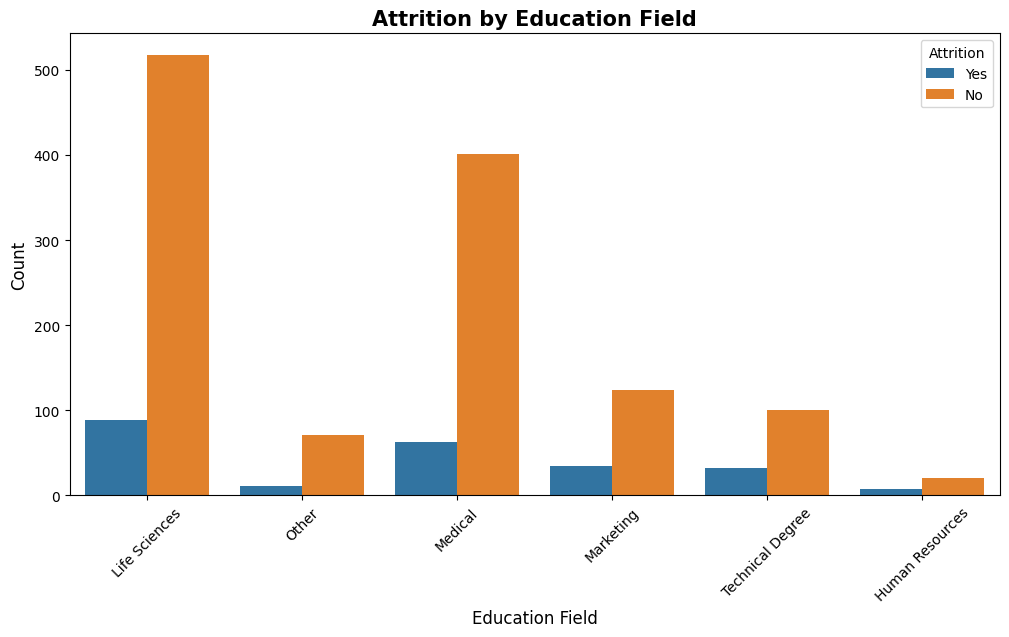

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.title('Attrition by Education Field', fontweight="bold", size=15)
plt.xlabel('Education Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # This will rotate the x-axis labels for better visibility
plt.show()


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

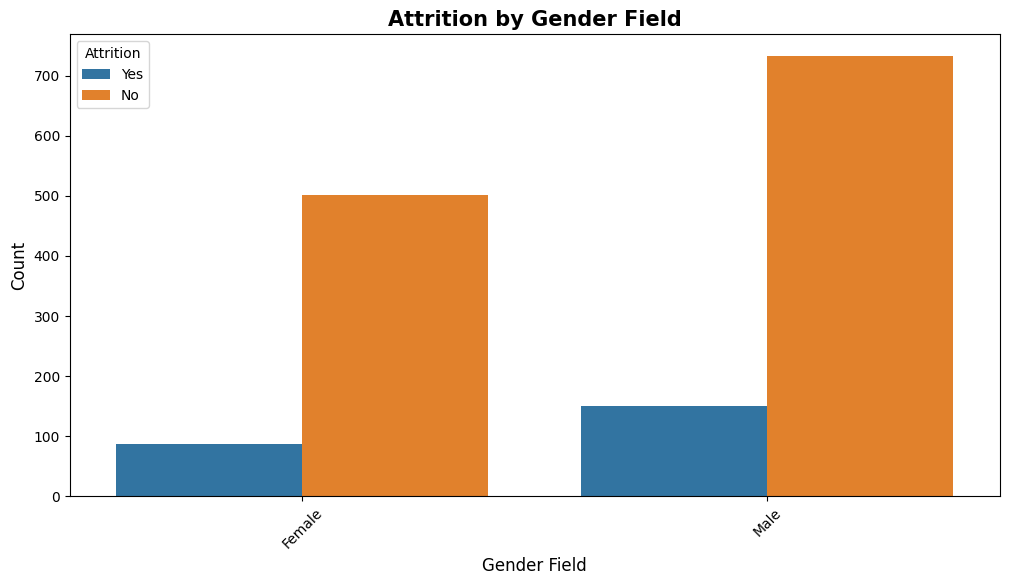

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender Field', fontweight="bold", size=15)
plt.xlabel('Gender Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # This will rotate the x-axis labels for better visibility
plt.show()

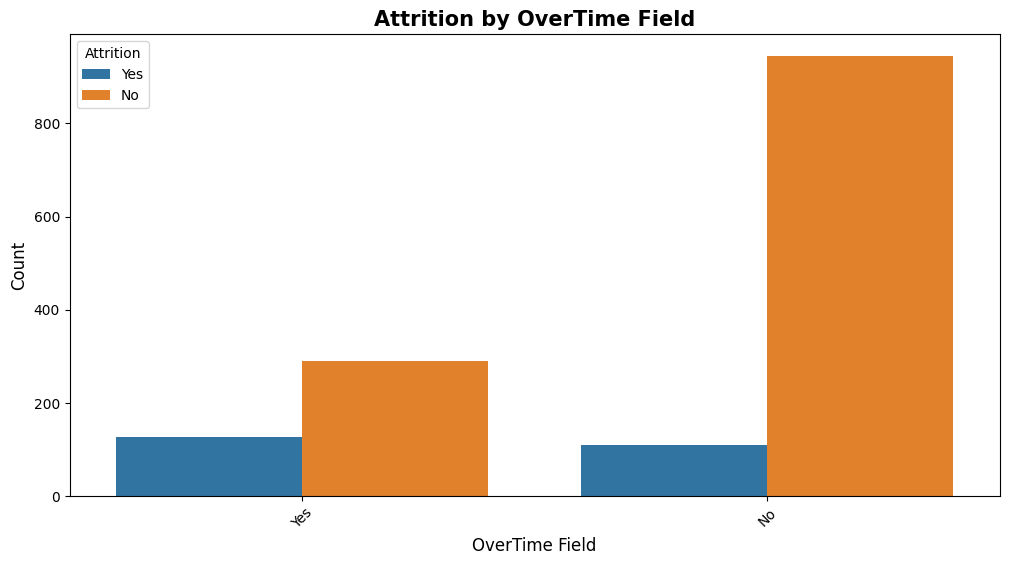

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime Field', fontweight="bold", size=15)
plt.xlabel('OverTime Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


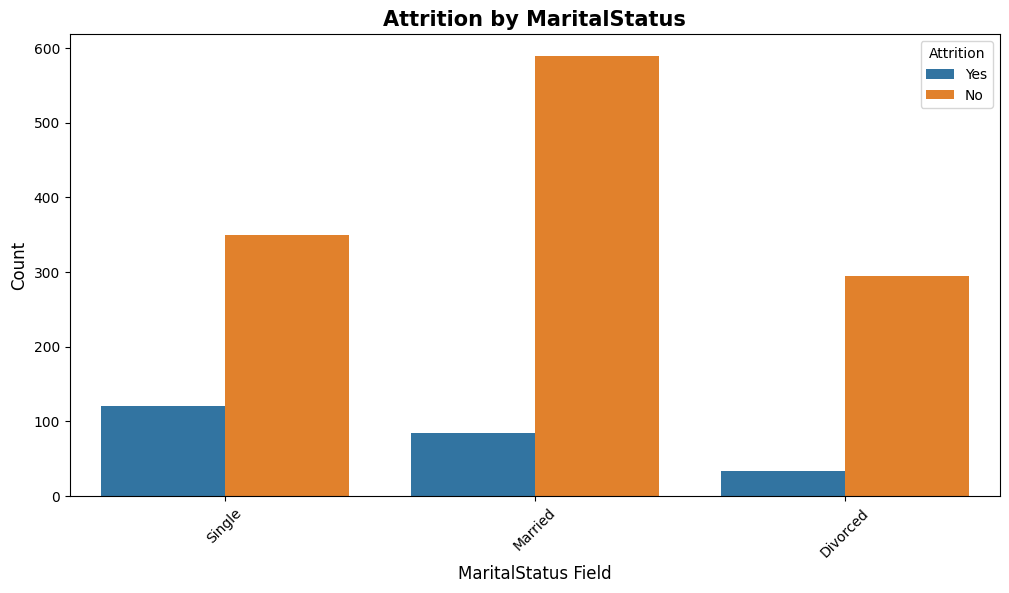

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition by MaritalStatus', fontweight="bold", size=15)
plt.xlabel('MaritalStatus Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


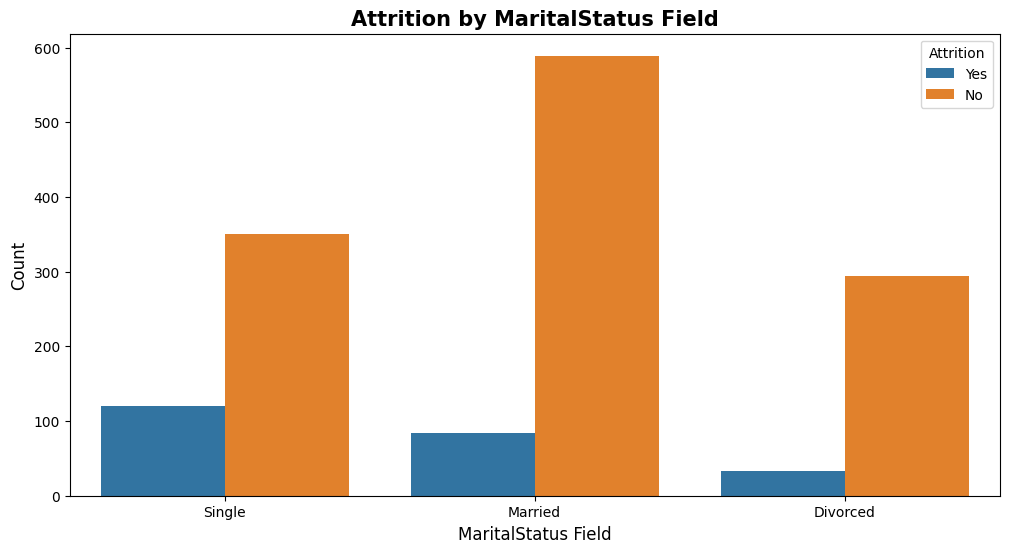

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition by MaritalStatus Field', fontweight="bold", size=15)
plt.xlabel('MaritalStatus Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
#plt.xticks(rotation=45)
plt.show()

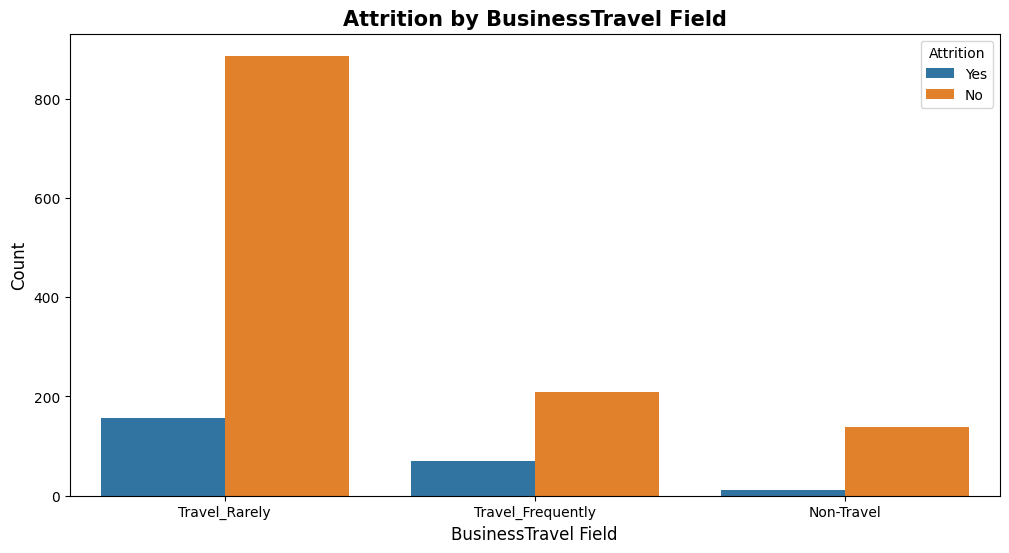

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Attrition by BusinessTravel Field', fontweight="bold", size=15)
plt.xlabel('BusinessTravel Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
#plt.xticks(rotation=45)
plt.show()

<ipython-input-23-653f985a4878>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True, linewidth =".5", fmt =".2f", cmap='coolwarm')


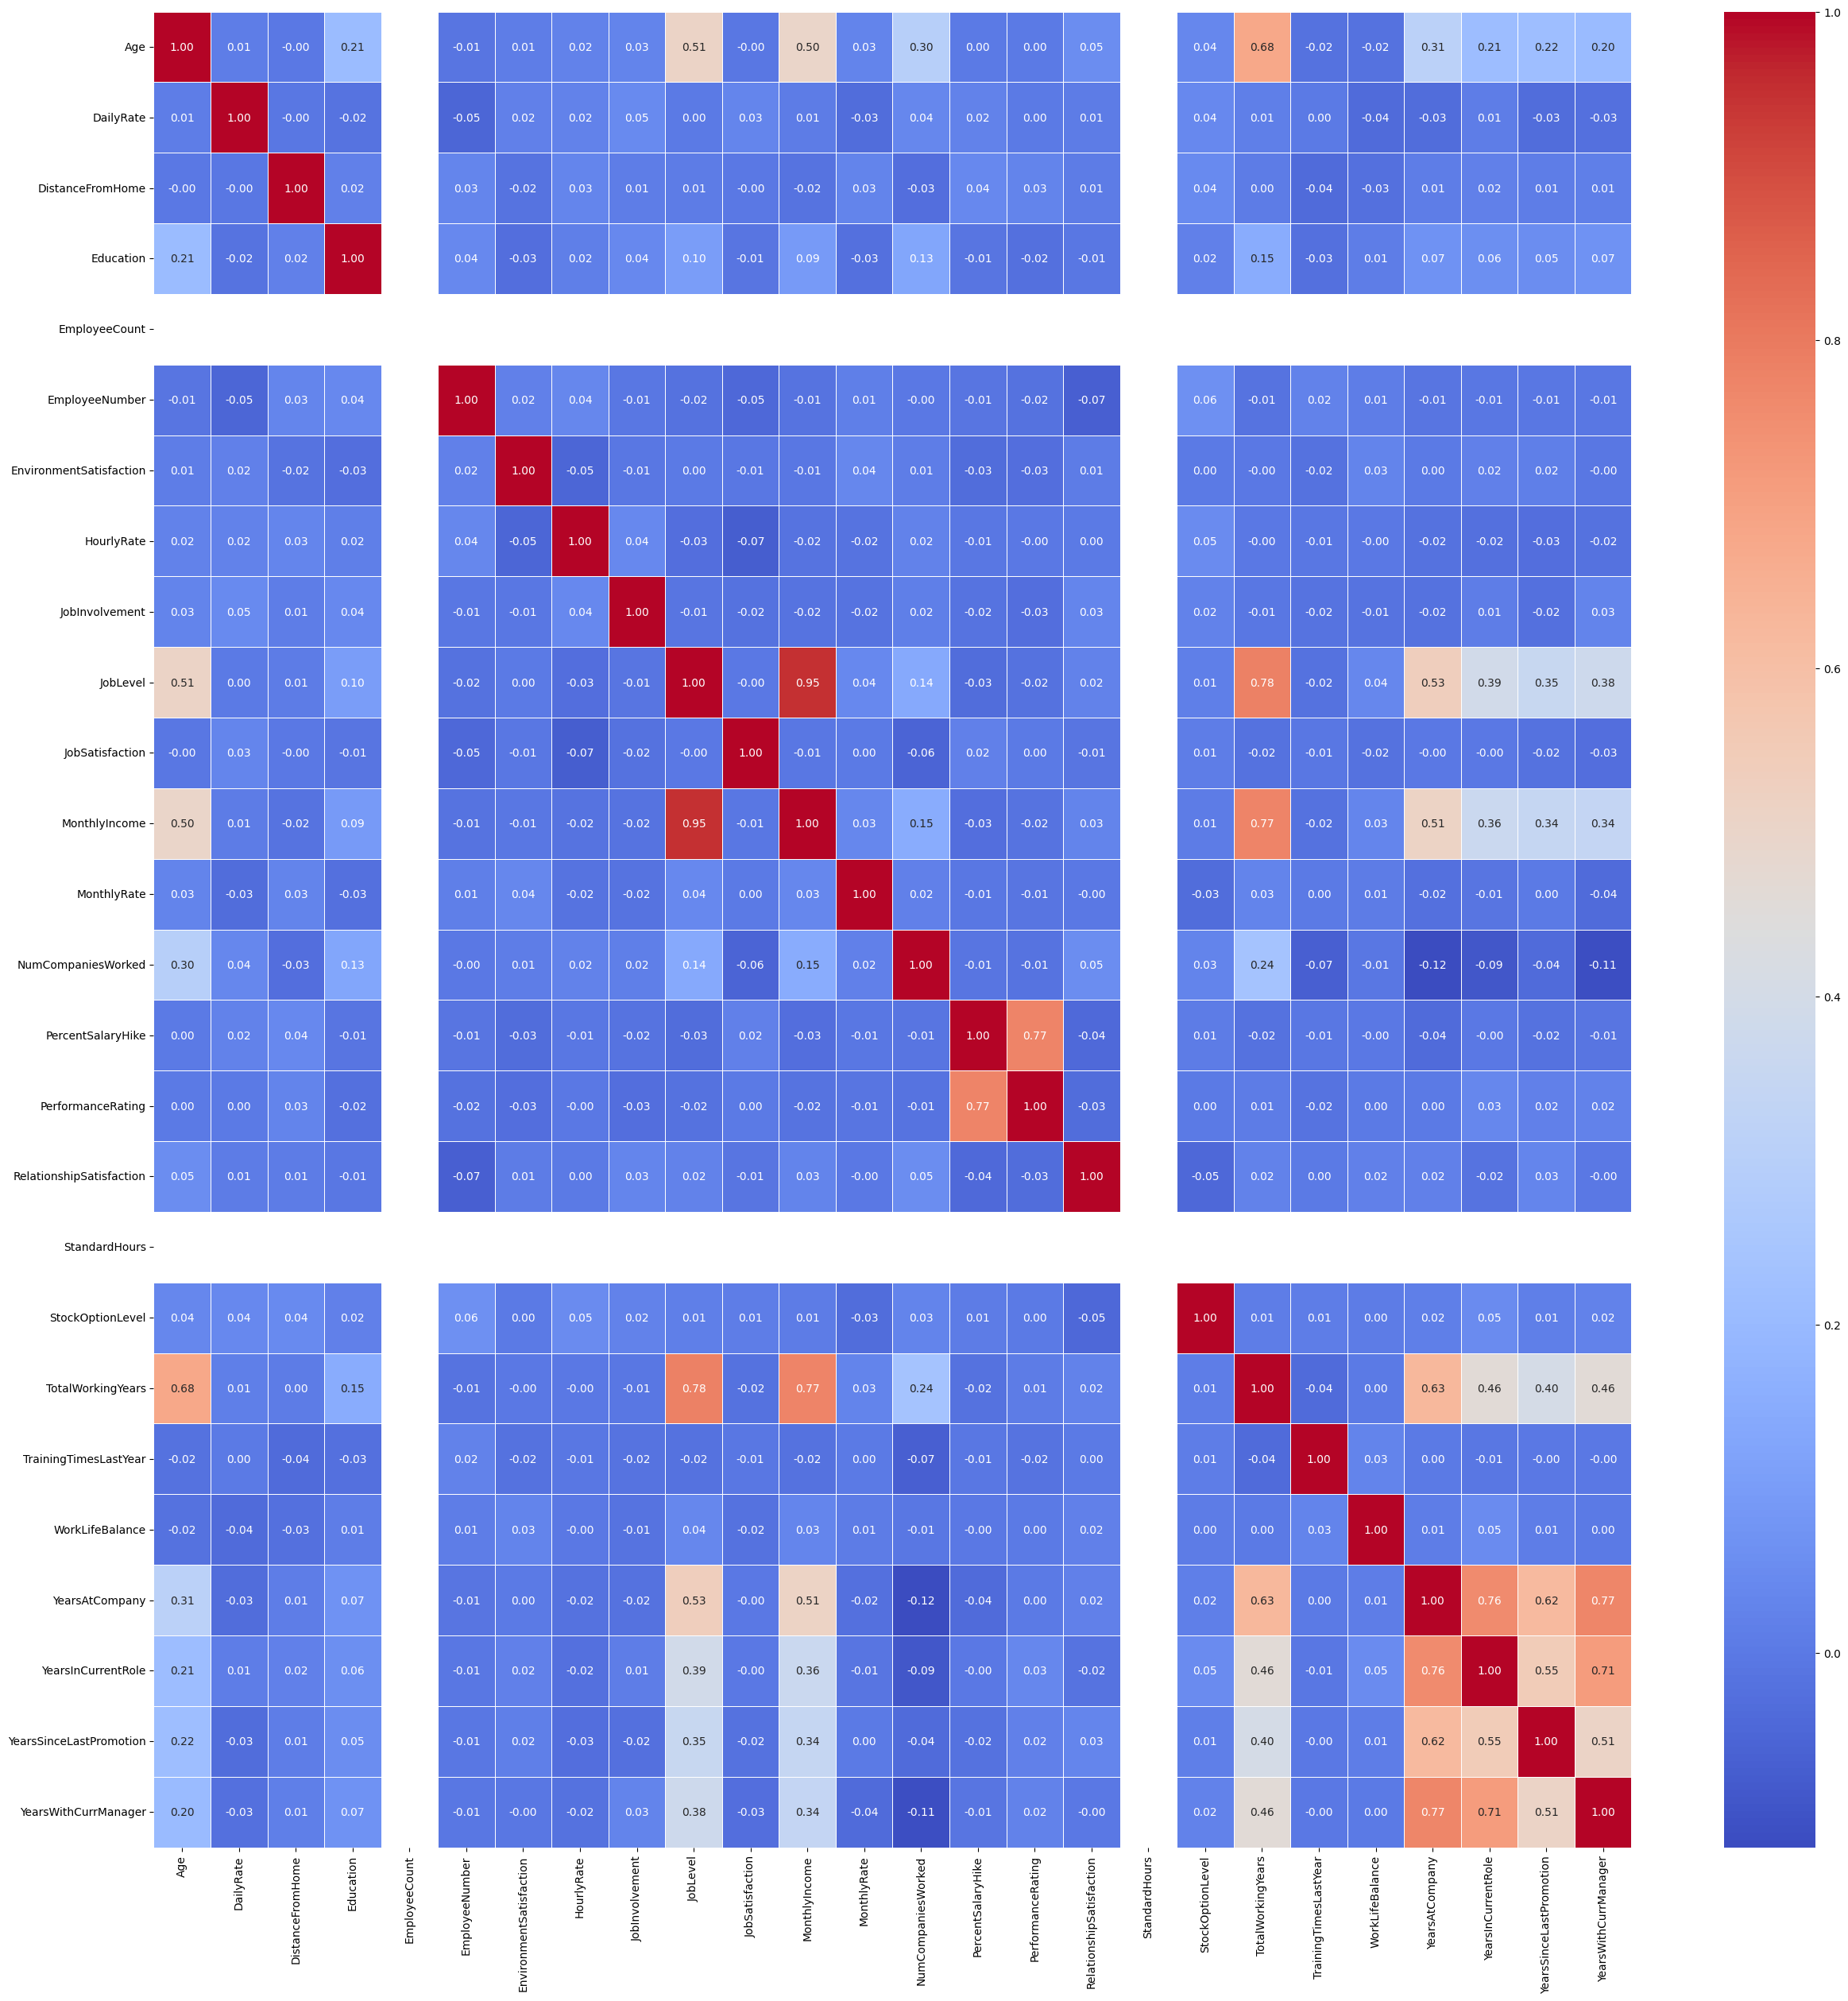

In [ ]:
#correlation map
df.corr
f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(), annot =True, linewidth =".5", fmt =".2f", cmap='coolwarm')
plt.show()

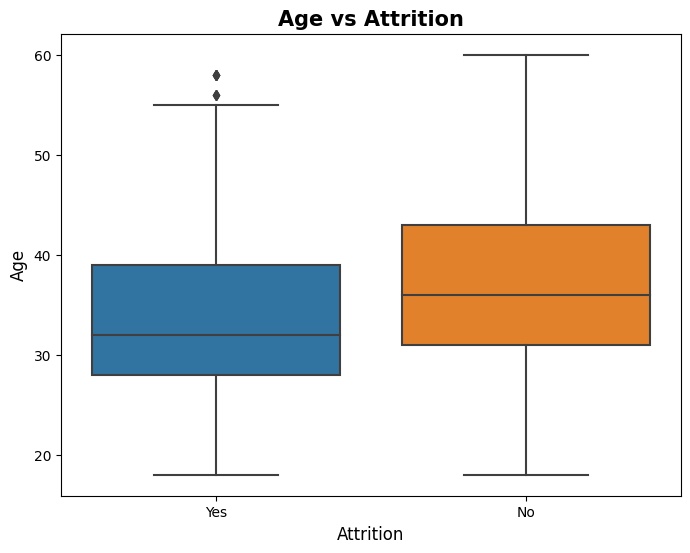

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='Age', data=df )
plt.title('Age vs Attrition', fontweight="bold", size=15)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()


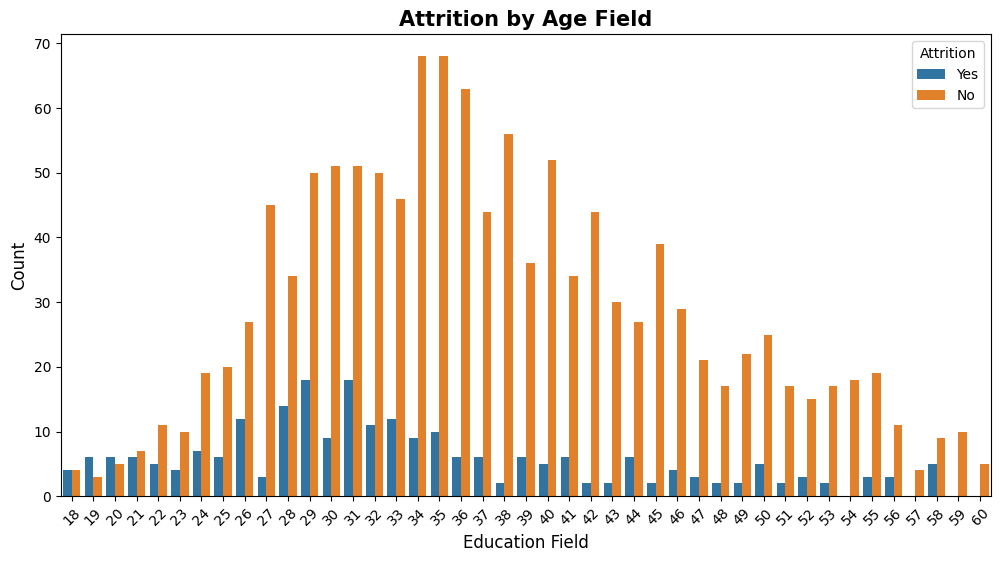

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Attrition by Age Field', fontweight="bold", size=15)
plt.xlabel('Education Field', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

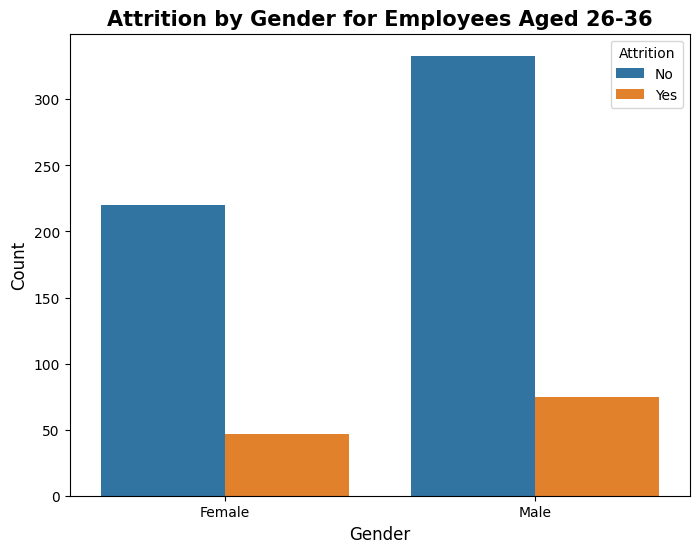

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to only include employees aged between 26 and 36
df_filtered = df[(df['Age'] >= 26) & (df['Age'] <= 36)]

plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Attrition', data=df_filtered)
plt.title('Attrition by Gender for Employees Aged 26-36', fontweight="bold", size=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


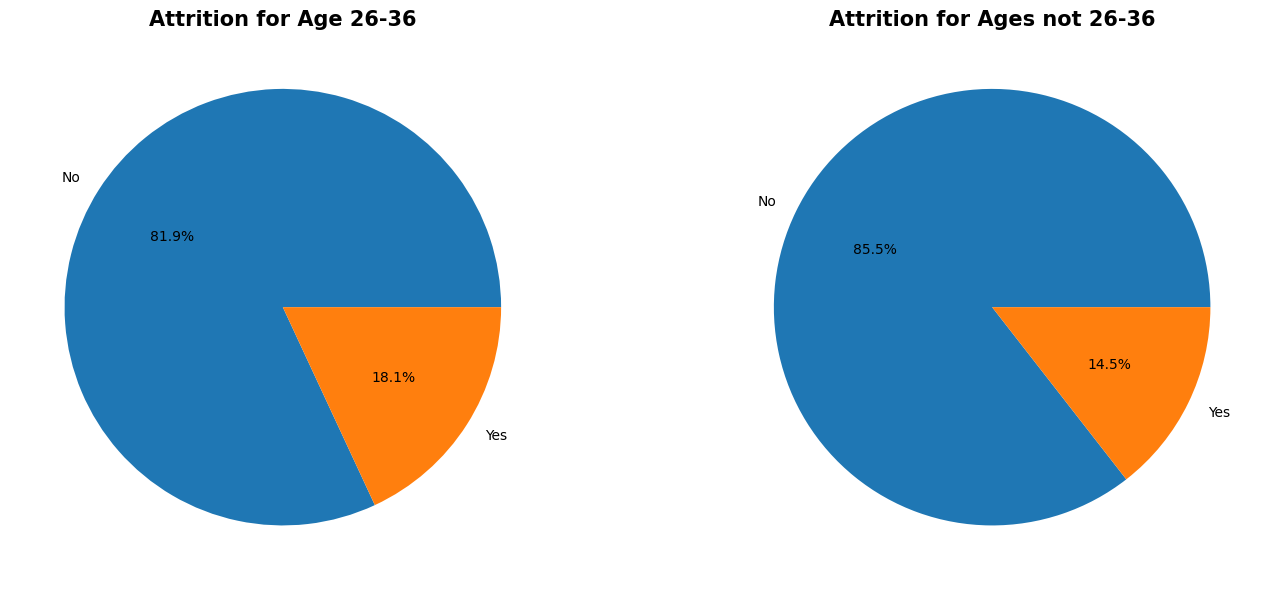

In [ ]:
import matplotlib.pyplot as plt

# Filter data for employees aged 26 to 36
df_26_36 = df[(df['Age'] >= 26) & (df['Age'] <= 36)]
attrition_26_36 = df_26_36['Attrition'].value_counts()

# Filter data for employees not within the age group 26 to 36
df_other_ages = df[(df['Age'] < 26) | (df['Age'] > 36)]
attrition_other_ages = df_other_ages['Attrition'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(15,6))

# First subplot for ages 26-36
ax[0].pie(attrition_26_36, labels=attrition_26_36.index, autopct='%1.1f%%')
ax[0].set_title('Attrition for Age 26-36', fontweight="bold", size=15)

# Second subplot for other ages
ax[1].pie(attrition_other_ages, labels=attrition_other_ages.index, autopct='%1.1f%%')
ax[1].set_title('Attrition for Ages not 26-36', fontweight="bold", size=15)

plt.tight_layout()
plt.show()


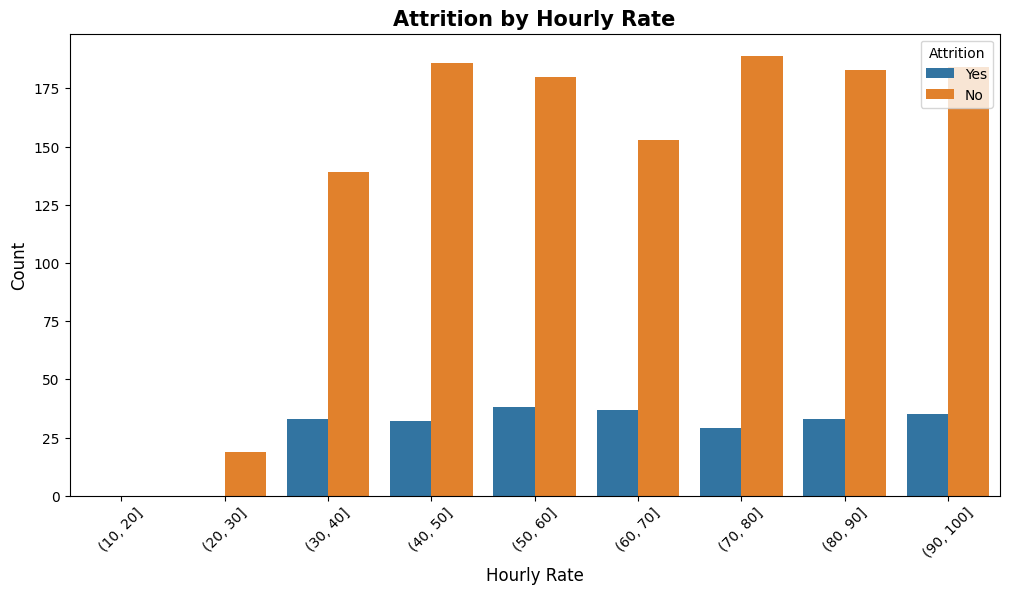

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the bins
bins = list(range(10, df['HourlyRate'].max() + 10, 10)) # adjust the range and step size as needed
df['HourlyRate_bins'] = pd.cut(df['HourlyRate'], bins=bins)

plt.figure(figsize=(12,6))
sns.countplot(x='HourlyRate_bins', hue='Attrition', data=df)
plt.title('Attrition by Hourly Rate', fontweight="bold", size=15)
plt.xlabel('Hourly Rate', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


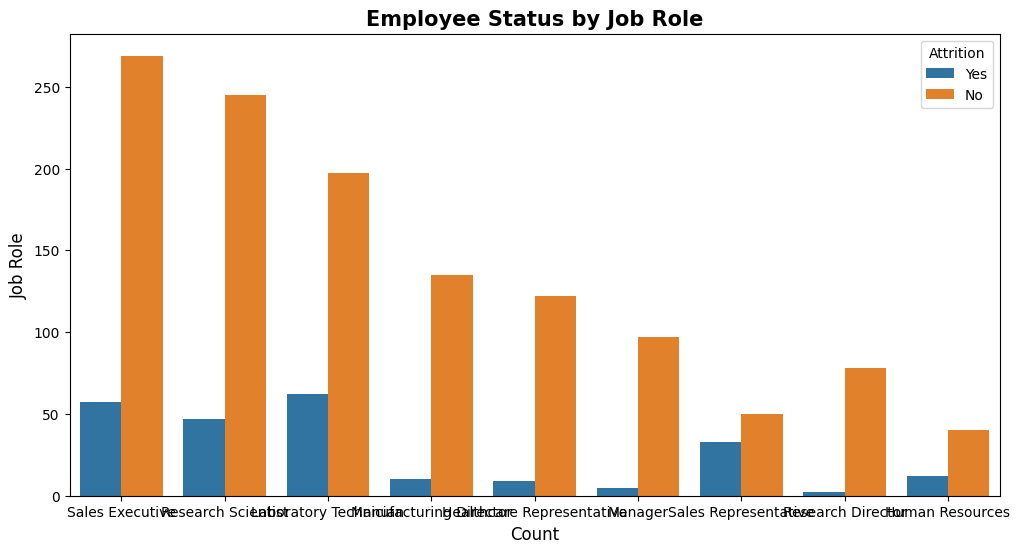

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Employee Status by Job Role', fontweight="bold", size=15)
plt.ylabel('Job Role', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()


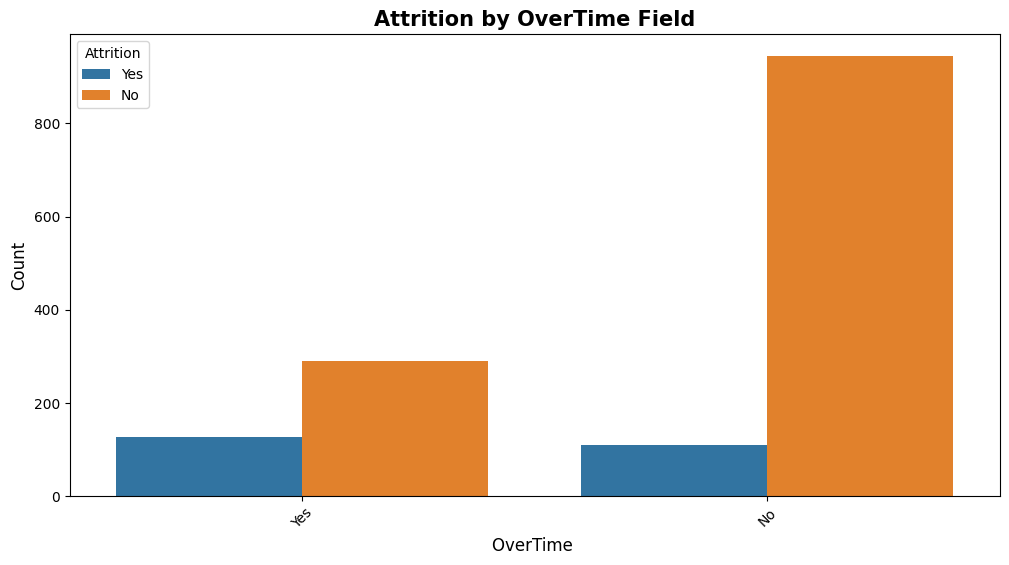

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime Field', fontweight="bold", size=15)
plt.xlabel('OverTime ', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # This will rotate the x-axis labels for better visibility
plt.show()

#Status Of Employee

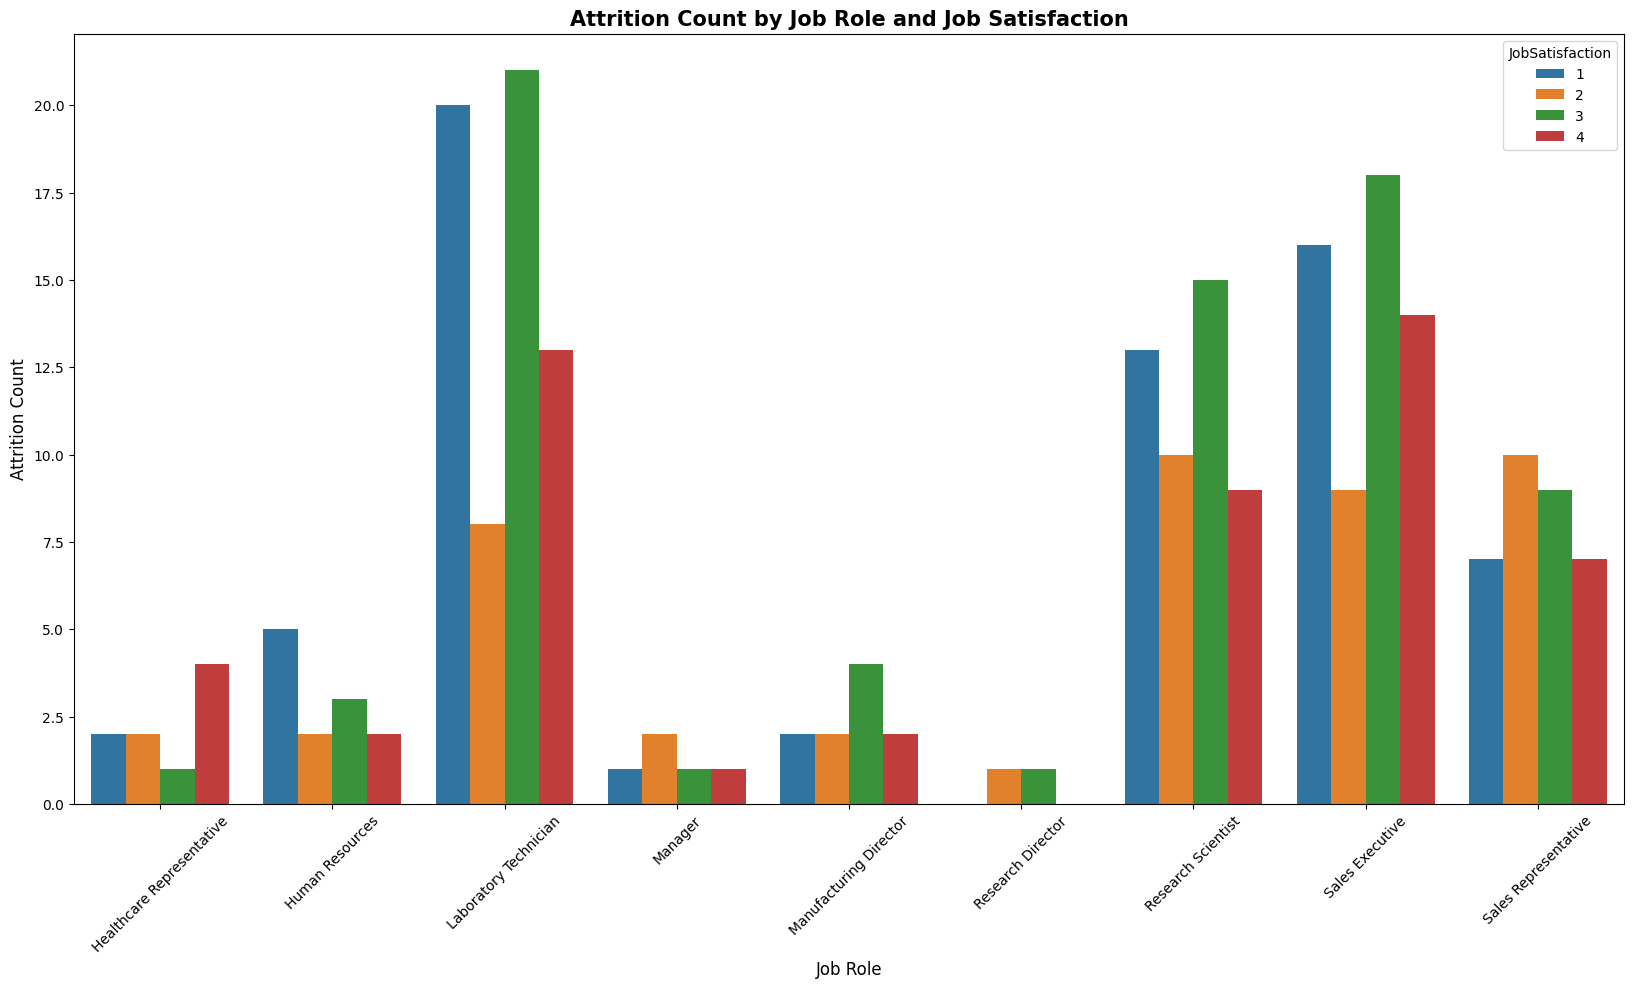

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new dataframe grouped by 'JobRole' and 'JobSatisfaction', and count the instances of 'Attrition'
grouped_df = df.groupby(['JobRole', 'JobSatisfaction', 'Attrition']).size().reset_index(name='Counts')

# Convert 'JobSatisfaction' back to categorical
grouped_df['JobSatisfaction'] = grouped_df['JobSatisfaction'].astype(str)

# Create a figure and axis for the plot
plt.figure(figsize=(20, 10))

# Create a barplot
sns.barplot(x='JobRole', y='Counts', hue='JobSatisfaction', data=grouped_df[grouped_df['Attrition'] == 'Yes'])

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Add labels and a title
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Attrition Count', fontsize=12)
plt.title('Attrition Count by Job Role and Job Satisfaction', fontweight='bold', size=15)

plt.show()


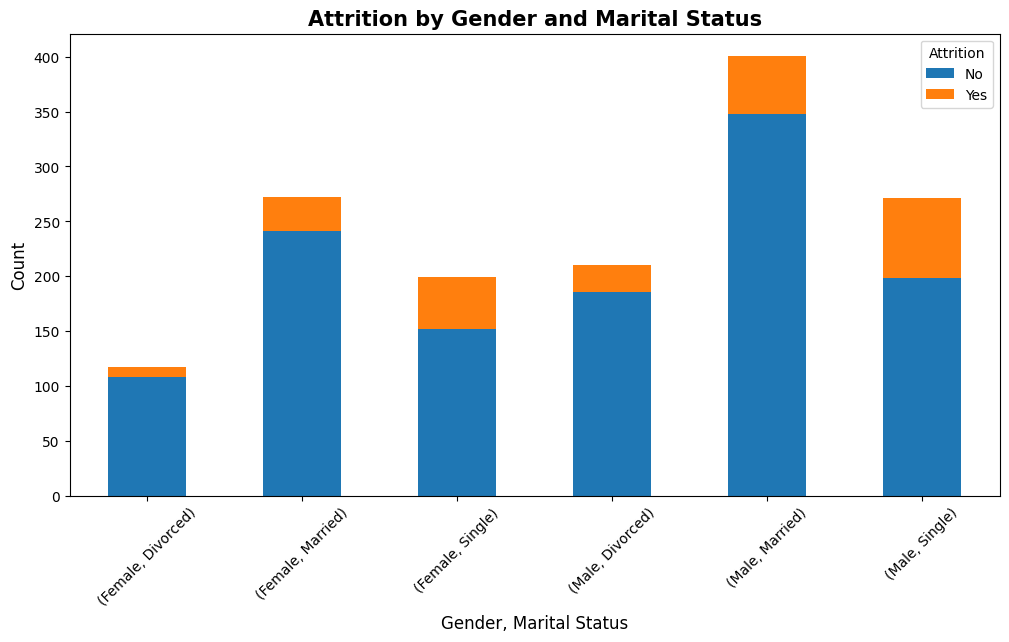

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame grouped by Gender and MaritalStatus
grouped = df.groupby(['Gender', 'MaritalStatus'])['Attrition'].value_counts().unstack()

# Plot the data
grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Attrition by Gender and Marital Status', fontweight="bold", size=15)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender, Marital Status', fontsize=12)
plt.xticks(rotation=45)
plt.show()


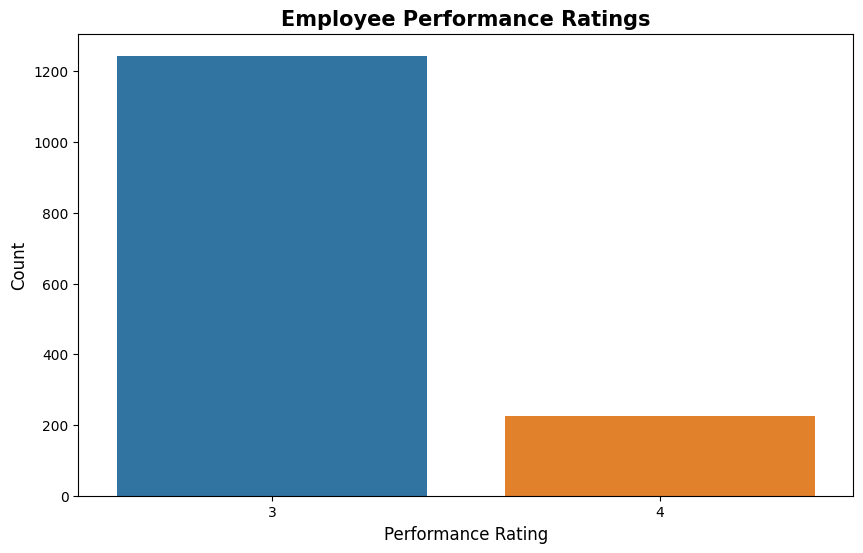

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='PerformanceRating', data=df)
plt.title('Employee Performance Ratings', fontweight="bold", size=15)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


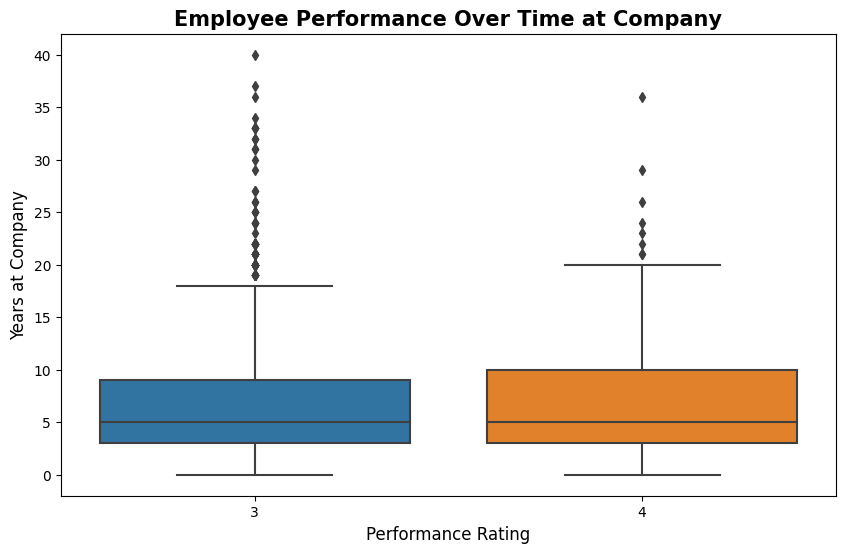

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='PerformanceRating', y='YearsAtCompany', data=df)
plt.title('Employee Performance Over Time at Company', fontweight="bold", size=15)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Years at Company', fontsize=12)
plt.show()


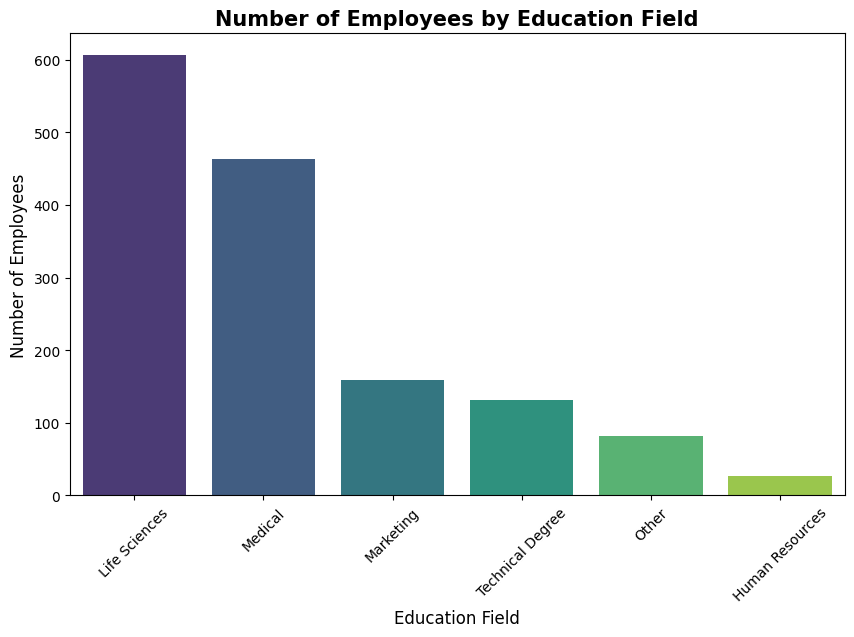

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each education field
education_counts = df['EducationField'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")
plt.title('Number of Employees by Education Field', fontweight="bold", size=15)
plt.xlabel('Education Field', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.show()


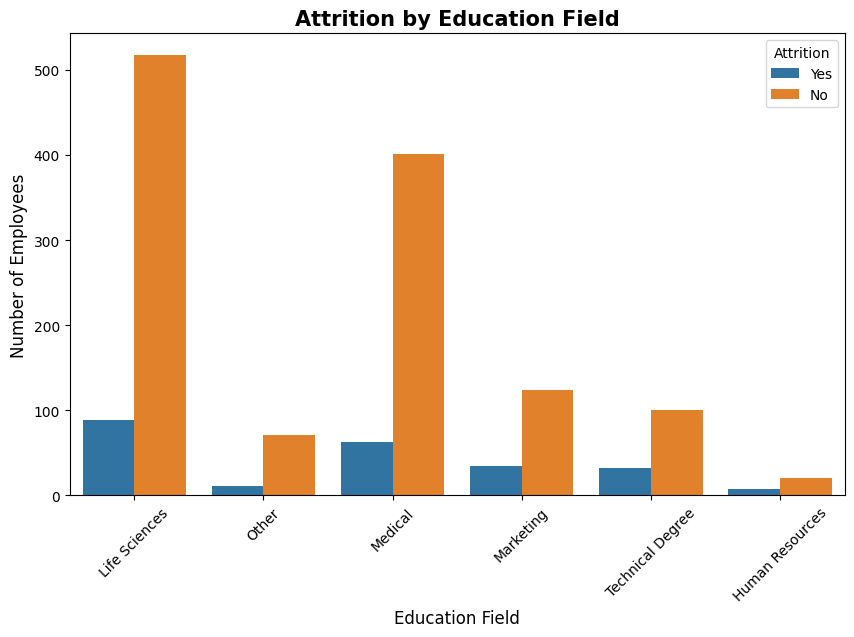

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='EducationField', hue='Attrition', data=df )
plt.title('Attrition by Education Field', fontweight="bold", size=15)
plt.xlabel('Education Field', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming df is your DataFrame
# Convert all categorical variables to numerical ones
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Split your data into features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression(max_iter=1000) # Increasing max_iter
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.891156462585034
Confusion Matrix: 
[[249   6]
 [ 26  13]]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming that 'Attrition' is your target column and df is your DataFrame
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your DataFrame
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


In [ ]:
# Encode the 'BusinessTravel' column using label encoding
le = LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

# If there are other columns that are categorical, do the same
# Replace 'column_name' with the actual column name
# df['column_name'] = le.fit_transform(df['column_name'])

# Split your data into features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
for col in df.columns:
    print(col, df[col].unique())


Age [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition [1 0]
BusinessTravel [2 1 0]
DailyRate [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 1452  465  70

In [ ]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HourlyRate_bins
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,"(90, 100]"
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,"(60, 70]"
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,"(90, 100]"
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,"(50, 60]"
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,80,1,17,3,3,5,2,0,3,"(40, 50]"
1466,39,0,2,613,1,6,1,3,1,2062,...,80,1,9,5,3,7,7,1,7,"(40, 50]"
1467,27,0,2,155,1,4,3,1,1,2064,...,80,1,6,0,3,6,2,0,3,"(80, 90]"
1468,49,0,1,1023,2,2,3,3,1,2065,...,80,0,17,3,2,9,6,0,8,"(60, 70]"


In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('Random Forest', RandomForestClassifier()),
    ('SVC', SVC(probability=True)),  # Set probability=True here
    ('GaussianNB', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('K Nearest Neighbors', KNeighborsClassifier())
]


In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')


Logistic Regression Accuracy: 0.9013605442176871
Random Forest Accuracy: 0.8741496598639455
SVC Accuracy: 0.8673469387755102
GaussianNB Accuracy: 0.8333333333333334
Decision Tree Accuracy: 0.7755102040816326
K Nearest Neighbors Accuracy: 0.8537414965986394


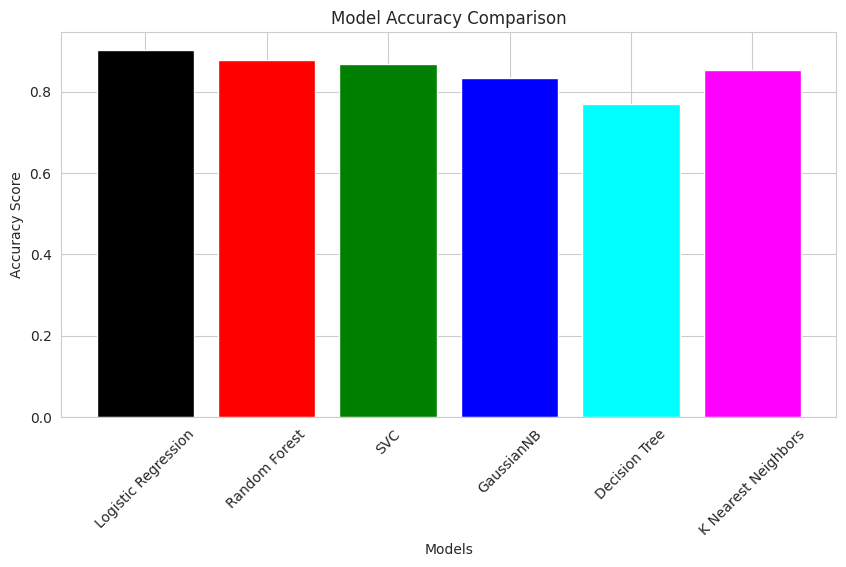

In [ ]:
import matplotlib.pyplot as plt

# Define your models and their accuracy
model_accuracy = {
    'Logistic Regression': 0.9013605442176871,
    'Random Forest': 0.8775510204081632,
    'SVC': 0.8673469387755102,
    'GaussianNB': 0.8333333333333334,
    'Decision Tree': 0.7687074829931972,
    'K Nearest Neighbors': 0.8537414965986394
}

# Prepare data for plotting
models = list(model_accuracy.keys())
accuracy = list(model_accuracy.values())

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color=['black', 'red', 'green', 'blue', 'cyan', 'magenta'])
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Sample data for prediction
sample_data = X_test.iloc[[0]]  # Double brackets to keep DataFrame structure

# Fit each model, make predictions, and print the accuracy score
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predict the sample data
    y_pred_sample = model.predict(sample_data)

    # Print the prediction result
    print(f'{name} Prediction: {y_pred_sample[0]}')


Logistic Regression Prediction: 0
Random Forest Prediction: 0
SVC Prediction: 0
GaussianNB Prediction: 0
Decision Tree Prediction: 0
K Nearest Neighbors Prediction: 0


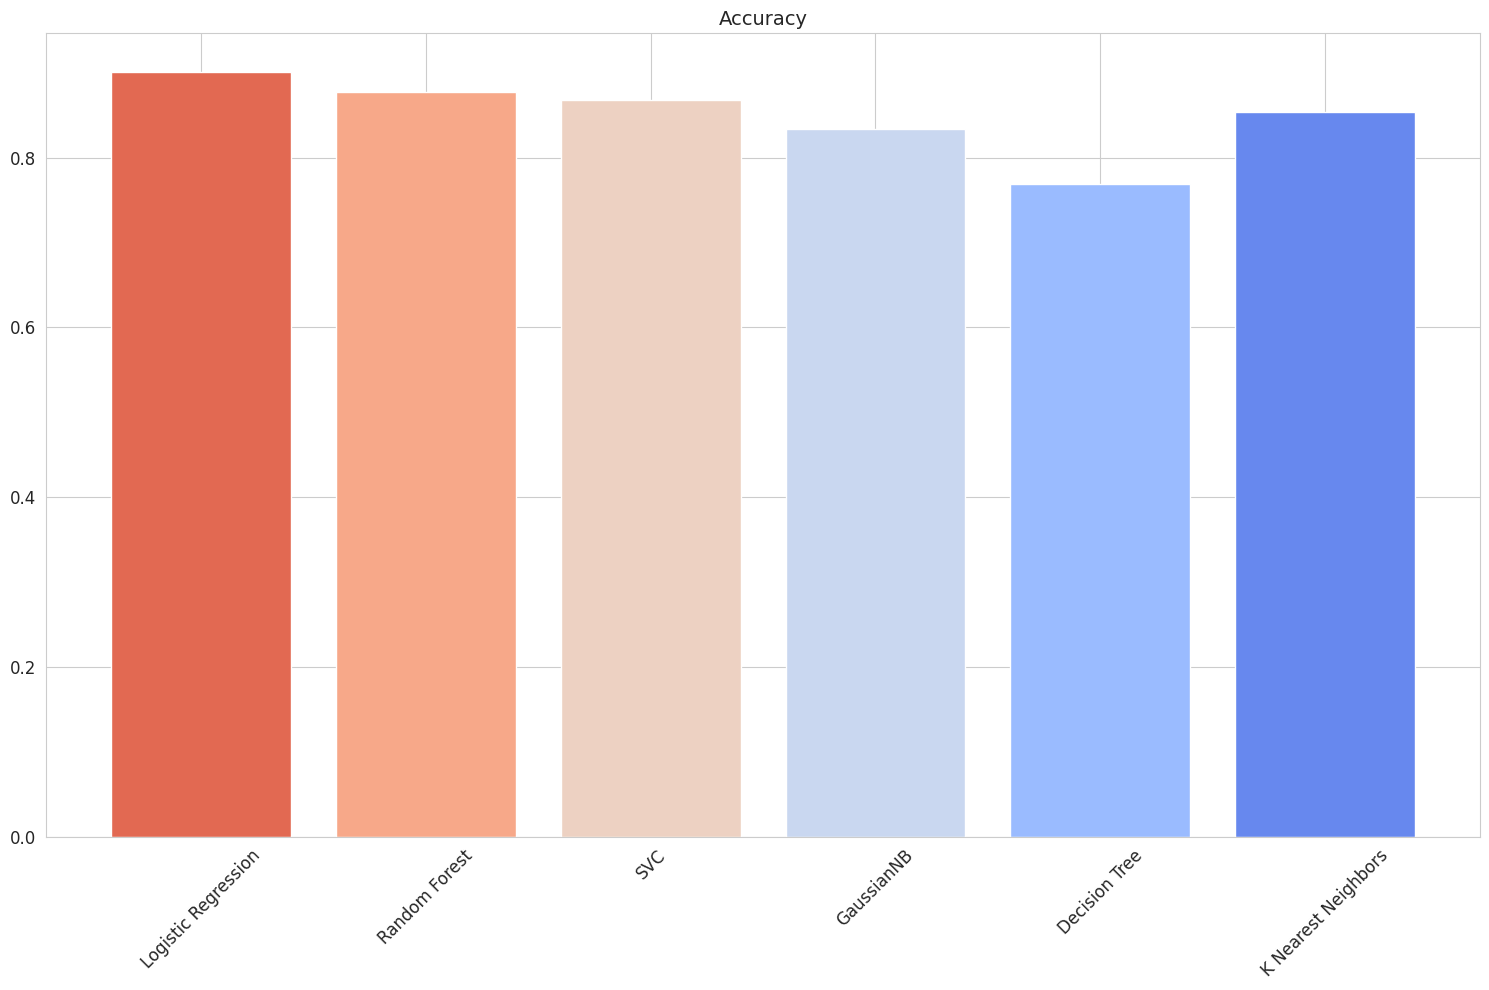

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy for each model
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC', 'GaussianNB', 'Decision Tree', 'K Nearest Neighbors'],
    'Accuracy': [0.9013605442176871, 0.8775510204081632, 0.8673469387755102, 0.8333333333333334, 0.7687074829931972, 0.8537414965986394]
})

# Use Seaborn styles for a more appealing look
sns.set_style("whitegrid")

# Set a color palette
palette = sns.color_palette("coolwarm_r", len(models))

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a bar plot for accuracy
plt.bar(results_df['Model'], results_df['Accuracy'], color=palette)
plt.title('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


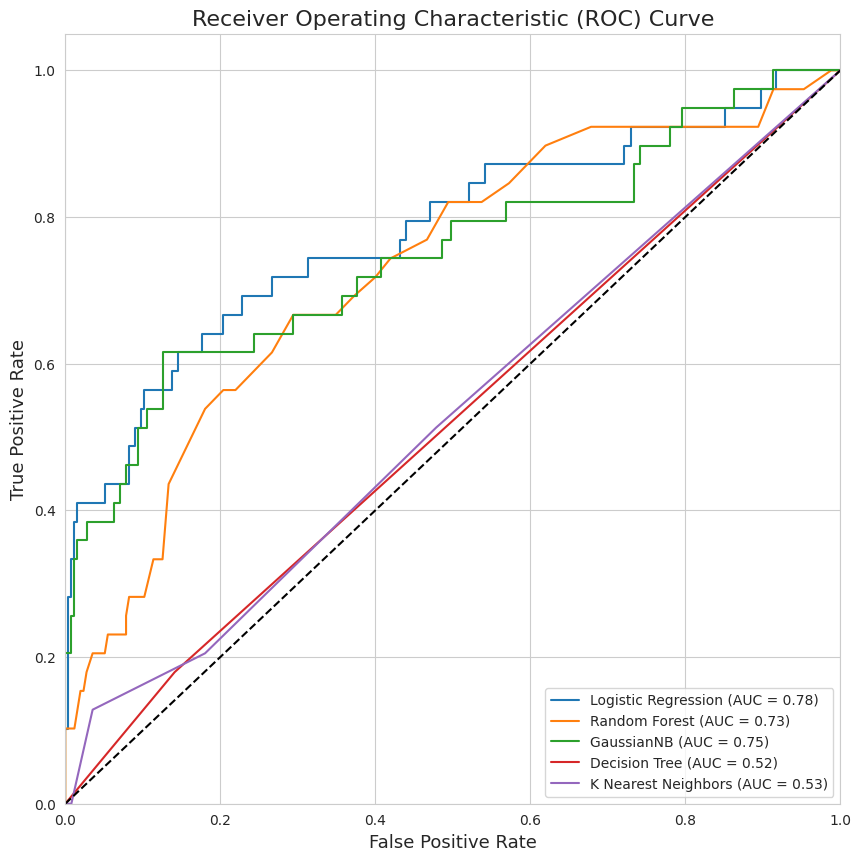

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))

# For each model
for name, model in models:
    try:
        # Predict probabilities for the positive class
        y_proba = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        # Compute ROC AUC
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    except AttributeError:
        continue

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Select a random instance from your test dataset
instance = X_test.sample()

# Print the true label for this instance
print("True label:", y_test.loc[instance.index].values[0])

# Loop over each model and make a prediction for this instance
for name, model in models:
    # Predict the label for the instance
    pred = model.predict(instance)

    # Print the predicted label
    print(f"{name} Prediction: {pred[0]}")


True label: 0
Logistic Regression Prediction: 0
Random Forest Prediction: 0
SVC Prediction: 0
GaussianNB Prediction: 0
Decision Tree Prediction: 0
K Nearest Neighbors Prediction: 0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Let's assume you have these variable definitions from before:
# models: list of tuples, each containing a model name and instance
# X_test: the testing data inputs
# y_test: the true labels for the testing data

# Create empty lists to store the metrics for each model
accuracies = []
precisions = []
recalls = []

# Evaluate each model
for name, model in models:
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate and store each metric
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))

# Now, accuracies, precisions, and recalls are lists of the respective metric for each model


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-79-787b7960a5f8>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(results_df.index, rotation=45, ha='right')


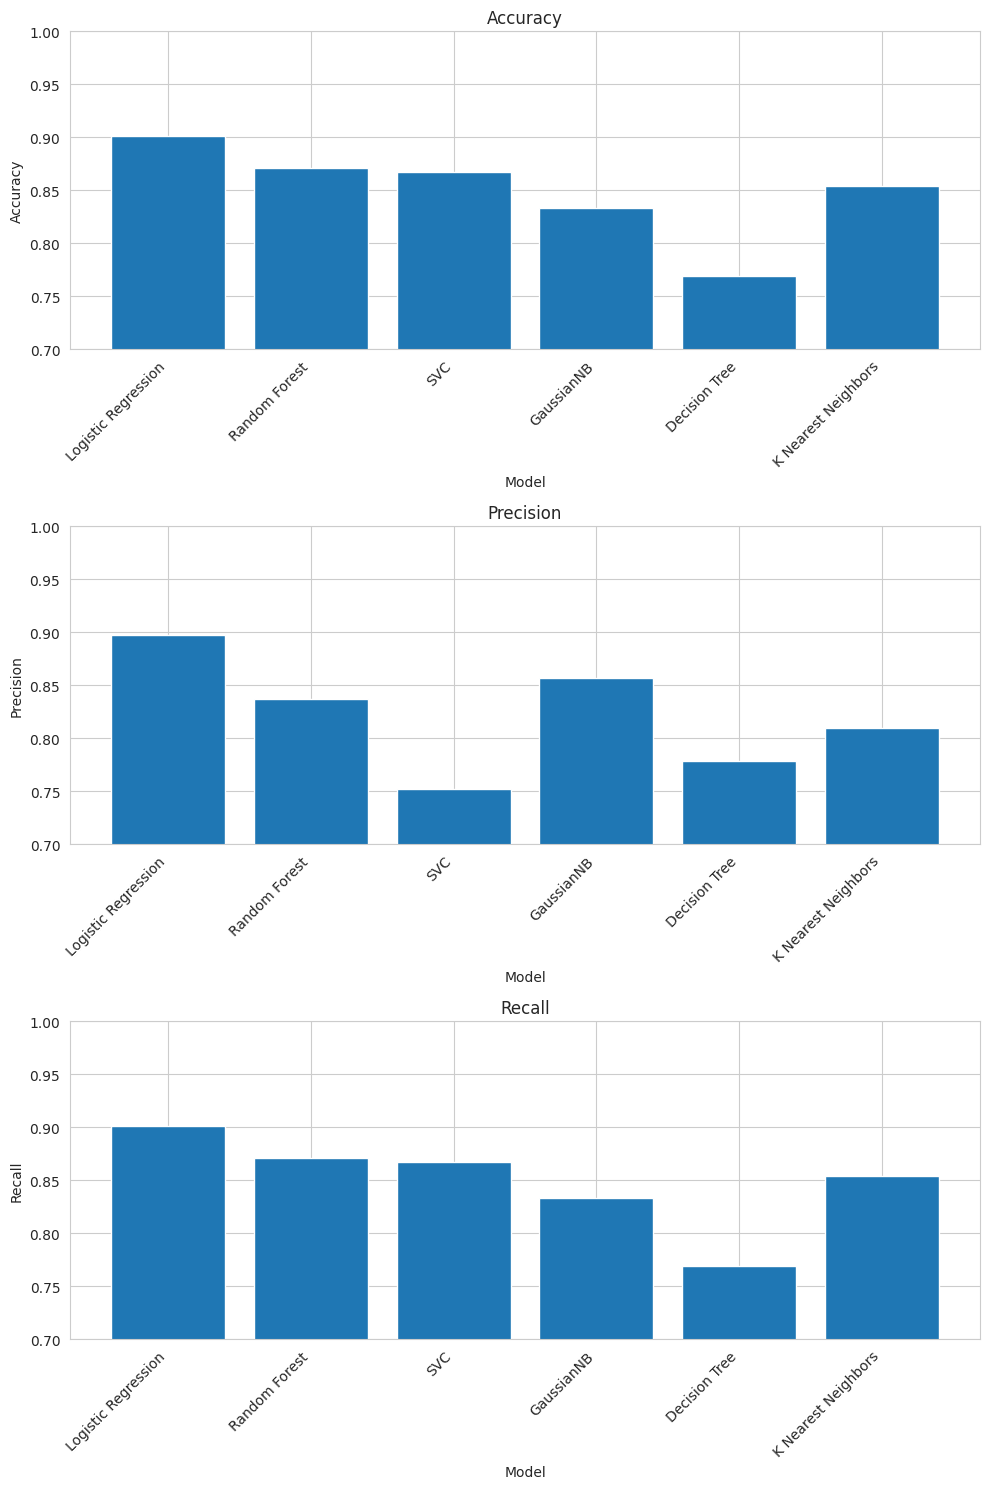

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with your model performance metrics
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC', 'GaussianNB', 'Decision Tree', 'K Nearest Neighbors'],
    'Accuracy': accuracies,  # replace with your actual values
    'Precision': precisions,  # replace with your actual values
    'Recall': recalls
}).set_index('Model')

# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Iterate over each metric
for i, metric in enumerate(results_df.columns):
    ax[i].bar(results_df.index, results_df[metric])
    ax[i].set_title(metric)
    ax[i].set_xlabel('Model')
    ax[i].set_ylabel(metric)
    ax[i].set_ylim([0.7, 1])  # set limits to make differences more visible
    ax[i].set_xticklabels(results_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
import pickle

# Assume that `model` is the trained model you want to save

# Save the model to a file
with open('finalized_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from a file
with open('finalized_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
# Here's some new data (the format should match your training data)
data = {
    'Age': [32],
    'BusinessTravel': ['Travel_Rarely'],
    'DailyRate': [250],
    'Department': ['Research & Development'],
    'DistanceFromHome': [5],
    'Education': [3],
    'EducationField': ['Life Sciences'],
    'EmployeeCount': [1],
    'EmployeeNumber': [2046],
    'EnvironmentSatisfaction': [3],
    'Gender': ['Female'],
    'HourlyRate': [65],
    'JobInvolvement': [3],
    'JobLevel': [2],
    'JobRole': ['Research Scientist'],
    'JobSatisfaction': [3],
    'MaritalStatus': ['Single'],
    'MonthlyIncome': [5000],
    'MonthlyRate': [12000],
    'NumCompaniesWorked': [2],
    'Over18': ['Y'],
    'OverTime': ['No'],
    'PercentSalaryHike': [15],
    'PerformanceRating': [3],
    'RelationshipSatisfaction': [4],
    'StandardHours': [80],
    'StockOptionLevel': [1],
    'TotalWorkingYears': [8],
    'TrainingTimesLastYear': [2],
    'WorkLifeBalance': [2],
    'YearsAtCompany': [6],
    'YearsInCurrentRole': [3],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [2]
    # add all other features here...
}

# Convert to DataFrame
new_data = pd.DataFrame(data)

# Preprocess the data
# Please note: The preprocessing steps would be exactly same as what you did for your training data
new_data['BusinessTravel'] = LabelEncoder().fit_transform(new_data['BusinessTravel'])
new_data['Department'] = LabelEncoder().fit_transform(new_data['Department'])
new_data['EducationField'] = LabelEncoder().fit_transform(new_data['EducationField'])
new_data['Gender'] = LabelEncoder().fit_transform(new_data['Gender'])
new_data['JobRole'] = LabelEncoder().fit_transform(new_data['JobRole'])
new_data['MaritalStatus'] = LabelEncoder().fit_transform(new_data['MaritalStatus'])
new_data['Over18'] = LabelEncoder().fit_transform(new_data['Over18'])
new_data['OverTime'] = LabelEncoder().fit_transform(new_data['OverTime'])
# Add other preprocessing steps here...

# Use StandardScaler for Age, DailyRate, HourlyRate, MonthlyIncome, and MonthlyRate
sc = StandardScaler()
new_data[['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = sc.fit_transform(new_data[['Age', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])

# Predict attrition
prediction = loaded_model.predict(new_data)
print('Attrition Prediction: ', prediction)


Attrition Prediction:  [0]


In [ ]:
features = X_train.columns.tolist()


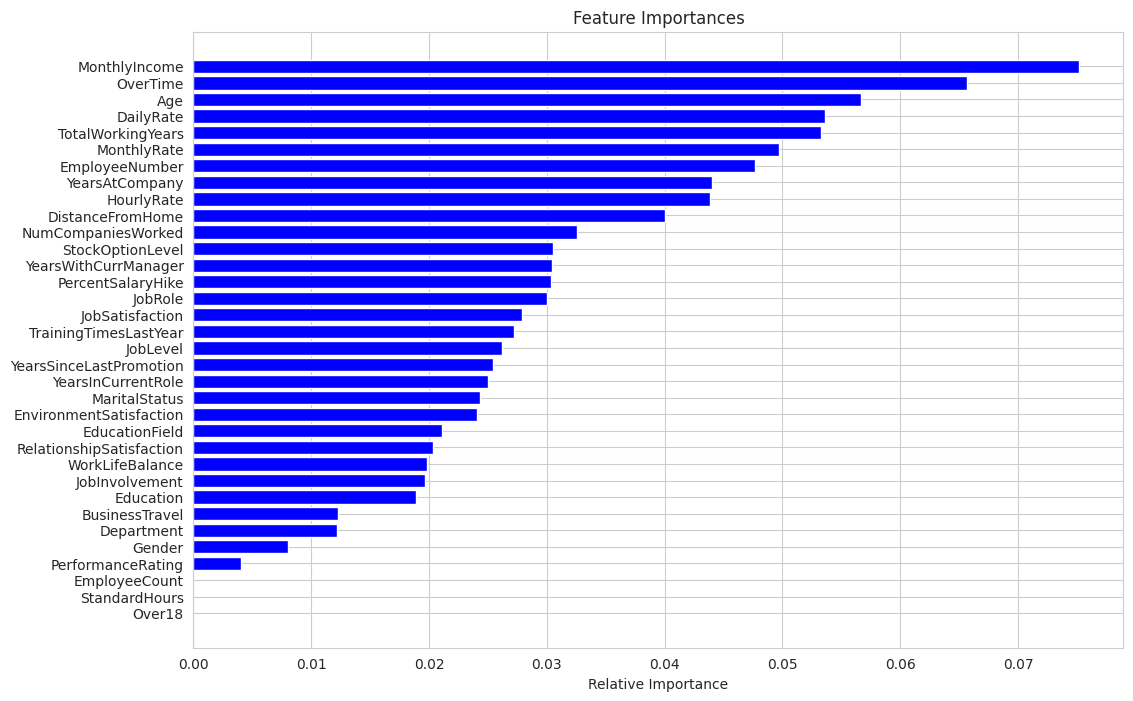

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train is your training data and y_train are your training labels
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)

# Get feature names
features = X_train.columns.tolist()

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
